# 1. 문제 정의

* 문제 상황 : 축구 선수가 꿈인 디미는 자신이 어느 축구 포지션에 가장 적합한 능력을 갖고 있는지 궁금하다.

* 문제 정의 : 실제 축구 선수들이 가진 능력치를 바탕으로 디미에게 가장 적합한 축구 포지션을 추천해 주자.

# 2. 데이터 수집

* 데이터 수집 출처 : [FIFA22 OFFICIAL DATASET](https://www.kaggle.com/bryanb/fifa-player-stats-database)

* 파일명 : FIFA22_official_data.csv

* 독립변수 : 23개

  * Crossing : 크로싱 능력
  * Finishing : 마무리 능력
  * ..
  * Positioning : 포지셔닝 능력

* 종속변수 : Best Position

In [10]:
# 데이터 가져오기
import numpy as np
import pandas as pd

df = pd.read_csv('./fifa/FIFA22_official_data.csv')
df.shape

(16710, 65)

In [11]:
# 열 정보 살펴보기
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16710 entries, 0 to 16709
Data columns (total 65 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        16710 non-null  int64  
 1   Name                      16710 non-null  object 
 2   Age                       16710 non-null  int64  
 3   Photo                     16710 non-null  object 
 4   Nationality               16710 non-null  object 
 5   Flag                      16710 non-null  object 
 6   Overall                   16710 non-null  int64  
 7   Potential                 16710 non-null  int64  
 8   Club                      16446 non-null  object 
 9   Club Logo                 16710 non-null  object 
 10  Value                     16710 non-null  object 
 11  Wage                      16710 non-null  object 
 12  Special                   16710 non-null  int64  
 13  Preferred Foot            16710 non-null  object 
 14  Intern

# 3. 데이터 전처리

* 결측치 확인 후 처리하기

* 불필요한 속성 삭제하기

* 범주형 데이터를 숫자형 데이터로 변환하기

* 특성 스케일링하기

In [12]:
# 결측치 갯수 알아보기
df.isnull().sum()

ID                        0
Name                      0
Age                       0
Photo                     0
Nationality               0
                       ... 
GKReflexes                0
Best Position             0
Best Overall Rating       0
Release Clause         1749
DefensiveAwareness      892
Length: 65, dtype: int64

In [13]:
# 결측치 삭제하기
df.dropna(inplace=True)
df.isnull().sum()

ID                     0.0
Name                   0.0
Age                    0.0
Photo                  0.0
Nationality            0.0
                      ... 
GKReflexes             0.0
Best Position          0.0
Best Overall Rating    0.0
Release Clause         0.0
DefensiveAwareness     0.0
Length: 65, dtype: float64

# 4. 데이터 탐색 및 시각화

In [14]:
# 포지션별 인원수 확인하기
df['Best Position'].value_counts()

Series([], Name: Best Position, dtype: int64)

In [15]:
# Position별 데이터 건수 확인하기
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='Best Position', data=df)

ValueError: min() arg is an empty sequence

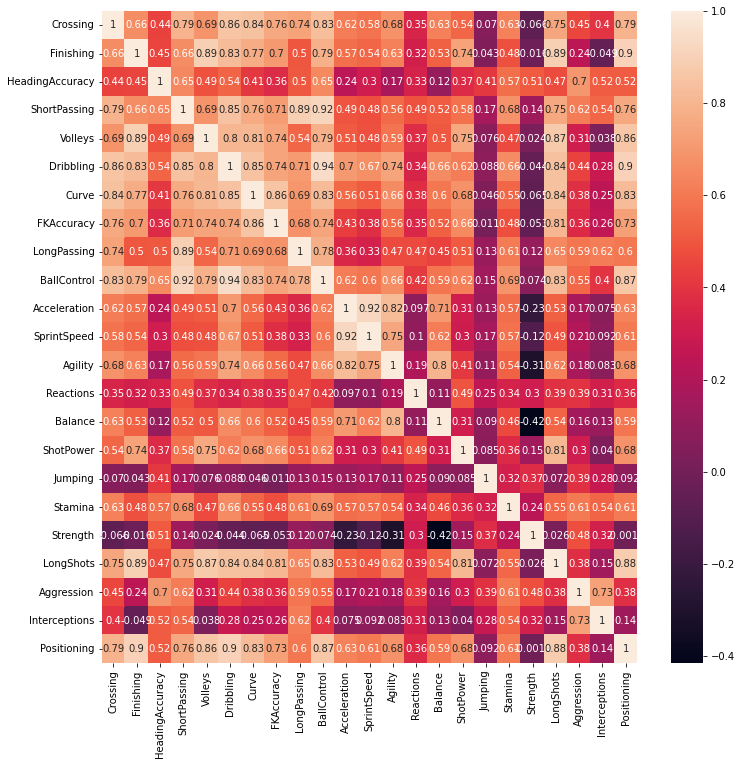

In [ ]:
# 특성별 상관관계 보기
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(), annot=True)
plt.show()

# 5. 모델 학습 및 평가

* 머신러닝 알고리즘 선택 : 결정트리, 랜덤포레스트

* 학습 후 특성 중요도 확인하기

* 분류 모델 평가 지표 : 정확도(Accuracy)

In [ ]:
# 데이터 분리하기
from sklearn.model_selection import train_test_split

X_data = df.drop('Best Position', axis=1).to_numpy()  # to_numpy()를 안해주면 y_test 데이터가 Series로 리턴됨
y_data = df['Best Position'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [ ]:
# 사이킷런 알고리즘 import하기
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
# Decision Tree로 학습 후 평가하기
dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)
print(dt.score(X_train, y_train))
print(dt.score(X_test, y_test))

1.0
0.5775112443778111


In [ ]:
# Decision Tree 과대적합 막기
params = {
    'max_depth': [4, 6, 8, 10, 12],
    'min_samples_split': [2, 3, 4]
}
dt = DecisionTreeClassifier()

gs = GridSearchCV(dt, param_grid=params, n_jobs=-1)

gs.fit(X_train, y_train)

print('best parameter:', gs.best_params_)
print('best score:', gs.best_score_)
print(gs.score(X_train, y_train))
print(gs.score(X_test, y_test))

best parameter: {'max_depth': 10, 'min_samples_split': 4}
best score: 0.6306803572342063
0.717948717948718
0.6287856071964018


In [ ]:
# Random Forest로 학습 후 평가하기
rf = RandomForestClassifier()

gs2 = GridSearchCV(rf, param_grid=params, n_jobs=-1)

gs2.fit(X_train, y_train)
 
print('best parameter:', gs2.best_params_)
print('best score:', gs2.best_score_)
print(gs2.score(X_train, y_train))
print(gs2.score(X_test, y_test))

best parameter: {'max_depth': 12, 'min_samples_split': 3}
best score: 0.6940328485925766
0.8875393612235718
0.6905547226386807


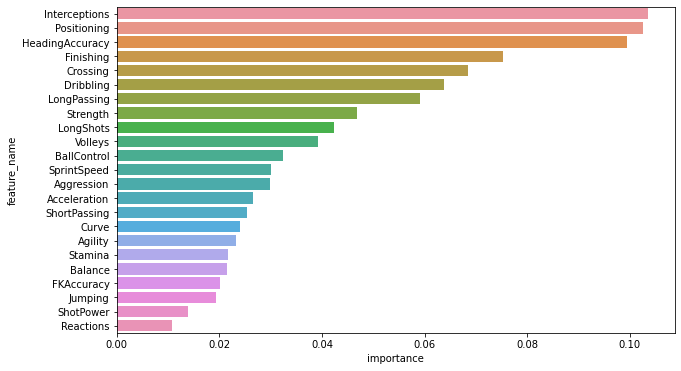

In [ ]:
# 특성 중요도 시각화하기
df2 = pd.DataFrame({
    'feature_name' : df.columns[:23],
    'importance' : gs2.best_estimator_.feature_importances_
})

df2 = df2.sort_values(by=['importance'], ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(y=df2['feature_name'], x=df2['importance'])

# 6. 모델 개선

* 개선1 : 중요한 특성 10개만 골라서 학습시키기 -> 0.67로 더 떨어짐

* 개선2 : 정답(레이블) 갯수 줄여보기 (1000명 이상인 Position만 고르기) -> 0.84로 올라감

  * CB     3208
  * ST     2537
  * CAM    2201
  * GK     1544
  * RM     1312
  * CDM    1259
  * CM     1008

In [ ]:
# 개선1 : 중요한 특성 10개만 고르기
X_data_new = df[['Interceptions', 'Positioning', 'HeadingAccuracy', 'Finishing', 'Crossing', 'Dribbling', 'LongPassing', 'Strength', 'LongShots', 'Volleys']].to_numpy()
y_data_new = df['Best Position'].to_numpy()

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_data_new, y_data_new, test_size=0.2)
X_train_new.shape, X_test_new.shape, y_train_new.shape, y_test_new.shape

((13338, 10), (3335, 10), (13338,), (3335,))

In [ ]:
# Random Forest로 학습 후 평가하기
rf = RandomForestClassifier()

gs2 = GridSearchCV(rf, param_grid=params, n_jobs=-1)

gs2.fit(X_train_new, y_train_new)
 
print('best parameter:', gs2.best_params_)
print('best score:', gs2.best_score_)
print(gs2.score(X_train_new, y_train_new))
print(gs2.score(X_test_new, y_test_new))

best parameter: {'max_depth': 12, 'min_samples_split': 3}
best score: 0.6750630871291013
0.8593492277702804
0.6767616191904048


In [ ]:
# 개선2 : 정답(레이블) 갯수 줄여보기
# CB, ST, CAM, GK, RM, CDM, CM
df_new = df[(df['Best Position'] == 'CB') | (df['Best Position'] == 'ST') | (df['Best Position'] == 'CAM') | (df['Best Position'] == 'GK') | (df['Best Position'] == 'RM') | (df['Best Position'] == 'CDM') | (df['Best Position'] == 'CM')]
df_new.shape

(13069, 24)

In [ ]:
# 포지션별 인원수 확인하기
df_new['Best Position'].value_counts()

CB     3208
ST     2537
CAM    2201
GK     1544
RM     1312
CDM    1259
CM     1008
Name: Best Position, dtype: int64

In [ ]:
# 데이터 분리하기
X_data_new = df_new.drop('Best Position', axis=1).to_numpy()
y_data_new = df_new['Best Position'].to_numpy()

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_data_new, y_data_new, test_size=0.2)
X_train_new.shape, X_test_new.shape, y_train_new.shape, y_test_new.shape

((10455, 23), (2614, 23), (10455,), (2614,))

In [ ]:
# Random Forest로 학습 후 평가하기
rf = RandomForestClassifier()

gs2 = GridSearchCV(rf, param_grid=params, n_jobs=-1)

gs2.fit(X_train_new, y_train_new)
 
print('best parameter:', gs2.best_params_)
print('best score:', gs2.best_score_)
print(gs2.score(X_train_new, y_train_new))
print(gs2.score(X_test_new, y_test_new))

best parameter: {'max_depth': 12, 'min_samples_split': 4}
best score: 0.8416068866571018
0.9720707795313247
0.8442999234889059


# 7. 문제 해결

* 디미의 능력치를 입력하여 예측한 결과 CM(Center Midfielder)에 적합하다는 예측 결과가 나옴

In [ ]:
# 디미 능력치를 입력하여 최적의 포지션 찾기
estimator = gs2.best_estimator_
estimator.predict([[68., 66., 65., 75., 64., 65., 63., 57., 74., 73., 51., 50., 62.,
       74., 67., 71., 64., 66., 65., 73., 73., 71., 71.]])

array(['CM'], dtype=object)

# 8. 평가

* 프로젝트를 통해 배운 점, 아쉬운 점 등을 작성합니다.